<a href="https://colab.research.google.com/github/BlackPuma075/Advanced_Lab_2025/blob/main/Final%20Project/Final_Project_Advanced_Lab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
!apt-get install -y gfortran
!git clone https://github.com/lesgourg/class_public.git
%cd class_public
!make

# Volver al directorio base
%cd python
!python3 setup.py install

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
gfortran is already the newest version (4:11.2.0-1ubuntu1).
0 upgraded, 0 newly installed, 0 to remove and 34 not upgraded.
Cloning into 'class_public'...
remote: Enumerating objects: 31195, done.
remote: Total 31195 (delta 0), reused 0 (delta 0), pack-reused 31195 (from 2)
Receiving objects: 100% (31195/31195), 772.26 MiB | 20.68 MiB/s, done.
Resolving deltas: 100% (21623/21623), done.
/content/class_public
if ! [ -e /content/class_public/build ]; then mkdir /content/class_public/build ; mkdir /content/class_public/build/lib; fi;
touch build/.base
cd /content/class_public/build;gcc -O3 -pthread  -g -fPIC -D__CLASSDIR__='"/content/class_public"' -DHYREC -I../include -I../external/RecfastCLASS -I../external/heating -I../external/HyRec2020 -I../external/Halofit -I../external/HMcode -c ../tools/growTable.c -o growTable.o
cd /content/class_public/build;gcc -O3 -pthread  -g -fPIC -D__CLASSDIR__=

In [8]:
from classy import Class

cosmo = Class()
cosmo.set({
    'h': 0.67,
    'omega_b': 0.022,
    'omega_cdm': 0.12,
    'A_s': 2.1e-9,
    'n_s': 0.96,
    'tau_reio': 0.06,
    'output': 'mPk',
    'P_k_max_1/Mpc': 10.0
})
cosmo.compute()

# Obtener espectro de potencia a z = 0
k_vals = [0.01, 0.1, 0.5]
for k in k_vals:
    print(f"P(k={k}) = {cosmo.pk(k, 0.0)}")

ks = np.logspace(-3, 1, 100)  # de 0.001 a 10 h/Mpc
Pk = [cosmo.pk(k, 0.0) for k in ks]

cosmo.struct_cleanup()
cosmo.empty()


P(k=0.01) = 81965.42474078349
P(k=0.1) = 10810.547181012911
P(k=0.5) = 447.1477181056167


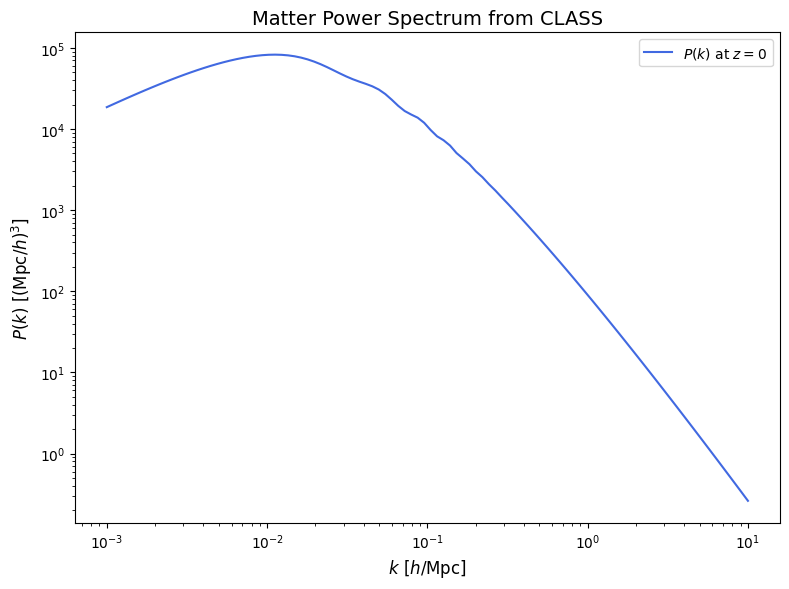

In [20]:
plt.figure(figsize=(8, 6))
plt.loglog(ks, Pk, label=r'$P(k)$ at $z=0$', color='royalblue')
plt.xlabel(r'$k\ [h/\mathrm{Mpc}]$', fontsize=12)
plt.ylabel(r'$P(k)\ [(\mathrm{Mpc}/h)^3]$', fontsize=12)
plt.title('Matter Power Spectrum from CLASS', fontsize=14)
#plt.grid(True, which="both", ls="--", lw=0.5)
plt.legend()
plt.tight_layout()
plt.show()

In [21]:
from scipy.integrate import simps
rs = np.logspace(-1, 2, 100)  # de 0.1 a 100 Mpc/h
xi_r = []

for r in rs:
    integrand = ks**2 * Pk * np.sinc(ks * r / np.pi)  # np.sinc(x) = sin(pi x)/(pi x)
    xi_val = simps(integrand, ks) * (1 / (2 * np.pi**2))
    xi_r.append(xi_val)

# Graficar
plt.figure(figsize=(8, 6))
plt.plot(rs, xi_r, label=r'$\xi(r)$', color='darkred')
plt.xscale('log')
plt.xlabel(r'$r\ [\mathrm{Mpc}/h]$', fontsize=12)
plt.ylabel(r'$\xi(r)$', fontsize=12)
plt.title('Correlation Function from Power Spectrum', fontsize=14)
plt.grid(True, which="both", ls="--", lw=0.5)
plt.legend()
plt.tight_layout()
plt.show()

ImportError: cannot import name 'simps' from 'scipy.integrate' (/usr/local/lib/python3.11/dist-packages/scipy/integrate/__init__.py)